# Pump It Up

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 读入数据
DIR = "D:\PlayGround\drivendata-nb\pumpItUp"
train_data = pd.read_csv(os.path.join(DIR, "train-values.csv"))
train_labels = pd.read_csv(os.path.join(DIR, "train-labels.csv"))
test_data = pd.read_csv(os.path.join(DIR, "test-values.csv"))

# 把train数据合在一起便于分析
train = pd.merge(train_data, train_labels, on='id')

In [246]:
# 计算缺失值比例的函数
def miss_rate(series):
    if series.dtype == 'object':
        return np.count_nonzero(series.isnull()) / series.shape[0]
    if series.dtype == 'int64' or series.dtype == 'float64':
        return 1 - np.count_nonzero(series) / series.shape[0]

# 画两个Series之间的堆叠柱状图
def stacked_bar(series1, series2, figsize=(14,8), ticksize=10, hspace=0.2, palette='Set2', pal_random=True):
    crosstab = pd.crosstab(series1, series2)
    crosstab_prob = pd.crosstab(series1, series2, normalize='index')
    
    print("bar order: ")
    for i in series2.unique()[::-1]:
        print('\t', str(i))
    
    stacks = list() 
    prob_stacks = list()
    for val in series2.unique():
        if stacks:
            stacks.append(crosstab[val] + stacks[-1])
        else:
            stacks.append(crosstab[val])
    
    for val in series2.unique():
        if prob_stacks:
            prob_stacks.append(crosstab_prob[val] + prob_stacks[-1])
        else:
            prob_stacks.append(crosstab_prob[val])
    
    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=figsize)
    color_palette = sns.color_palette(palette, series2.unique().shape[0]+5)    # 调色盘设置
    if pal_random:
        np.random.shuffle(color_palette)    # 如果pal_random==True, 则随机排列palette
    plt.subplots_adjust(hspace=hspace)    # 图像之间的垂直距离
    
    i, j = 0, 0
    for item in stacks[::-1]:
        sns.barplot(item.index, item.values, ax=ax0, color=color_palette[i])
        xticklabels = ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)
        i += 1
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(ticksize)
    
    for item in prob_stacks[::-1]:
        sns.barplot(item.index, item.values, ax=ax1, color=color_palette[j])
        xticklabels = ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
        j += 1
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(ticksize)

In [9]:
train_data.iloc[:, :10].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0


In [10]:
train_data.iloc[:, 10:20].head()

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd


In [11]:
train_data.iloc[:, 20:30].head()

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
0,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually
1,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay
2,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket
3,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay
4,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay


In [12]:
train_data.iloc[:, 30:].head()

,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## 特征解释
id

### 管理者相关

date_recorded: 记录时间，目测不相关，可能存在记录误差

recorded_by: 记录人

permit: 经过允许的

funder: 赞助商

installer: 安装方，待确认与目标值的关系

scheme_management: 管理方

scheme_name: 管理方名称

management: 管理者

management_group: 管理者组别

---

---

### 地区相关

amount_tsh: 处理缺失值，异常值

gps_height: gps高度，有缺失值

longitude: 经度

latitude: 纬度

num_private: (无说明)

basin: 流域

subvillage: 地区

region: 地区

region_code: 地区code

district_code: 二级区域code

lga: 地区

ward: 地区

population: 人口

public_meeting: 聚集区？

---

---

### 取水点相关

construction_year: 建筑年份

wpt_name: 取水点的名字…

extraction_type: 抽水类型

extraction_type_group: 抽水类型分组

extraction_type_class: 抽水类型分类

payment: 付费类型

payment_type: 付费类型

water_quality: 水质

quality_group: 水质等级

quantity: 水量

quantity_group: 水量等级

source: 水源（同source_type）

source_type:水源类型（收集雨水、水坝、泉水、钻孔等）

source_class: 水源类型（地下水、地表水等）

waterpoint_type: 取水点类型

waterpoint_type_group: 同上


In [24]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

### 关于funder的信息

In [289]:
miss_rate(train['funder'])

0.0611952861952862

In [48]:
# pd.pivot_table(data=train, index='funder', columns='status_group', values='id', aggfunc=len).fillna(0)

funder_cnt = train.groupby(['funder', 'status_group'])['id'].count().unstack(level=-1).fillna(0)
funder_cnt['total'] = funder_cnt.sum(axis=1)
funder_cnt.sort_values(by='total', ascending=False)

status_group,functional,functional needs repair,non functional,total
funder,,,,
Government Of Tanzania,3720.0,701.0,4663.0,9084.0
Danida,1713.0,159.0,1242.0,3114.0
Hesawa,936.0,232.0,1034.0,2202.0
Rwssp,805.0,109.0,460.0,1374.0
World Bank,545.0,97.0,707.0,1349.0
Kkkt,723.0,66.0,498.0,1287.0
World Vision,743.0,131.0,372.0,1246.0
Unicef,600.0,99.0,358.0,1057.0
Tasaf,493.0,64.0,320.0,877.0


In [51]:
funder_cnt.describe()

status_group,functional,functional needs repair,non functional,total
count,1897.000000,1897.000000,1897.000000,1897.000000
mean,15.960991,2.045335,11.390090,29.396415
std,110.468467,19.861972,119.271137,244.900445
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000
75%,3.000000,0.000000,2.000000,7.000000
max,3720.000000,701.000000,4663.000000,9084.000000


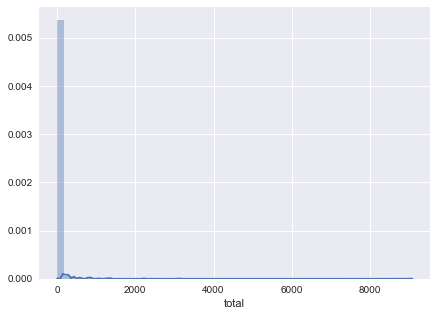

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
sns.distplot(funder_cnt['total'], ax=ax)

### 关于permit的信息

似乎True和False差别不大

In [70]:
permit_cnt = train.groupby(['permit', 'status_group'])['id'].count().reset_index()

In [71]:
permit_cnt

,permit,status_group,id
0,False,functional,9045
1,False,functional needs repair,1320
2,False,non functional,7127
3,True,functional,21541
4,True,functional needs repair,2697
5,True,non functional,14614


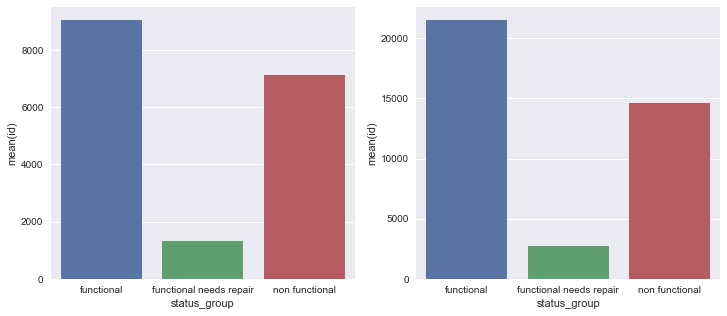

In [81]:
# 画图，左边是permit=False，右边是permit=True
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.barplot(data=permit_cnt[permit_cnt['permit']==False], x='status_group', y='id', ax=ax0)
sns.barplot(data=permit_cnt[permit_cnt['permit']==True], x='status_group', y='id', ax=ax1)

## 地区相关
### amount_tsh

In [4]:
amount_tsh = train[['amount_tsh', 'status_group']]

In [26]:
amount_tsh[amount_tsh['amount_tsh'] > 0].count() / amount_tsh.shape[0]

# 29.9%的amount_tsh不为0, 另外的70.1%为0

amount_tsh_pos = amount_tsh[amount_tsh['amount_tsh'] > 0]

amount_tsh      0.299007
status_group    0.299007
dtype: float64

In [34]:
amount_tsh_pos[amount_tsh_pos['amount_tsh'] < 10000].count() / amount_tsh_pos.shape[0]

# 大于0的点中，98.67%的值小于10000

amount_tsh      0.986656
status_group    0.986656
dtype: float64

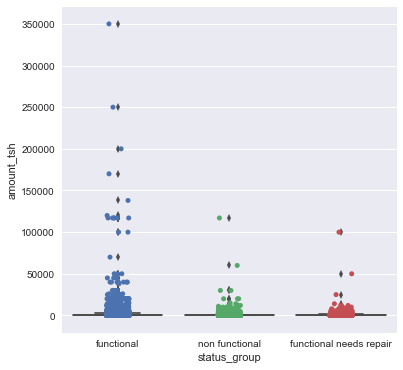

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.boxplot(amount_tsh_pos['status_group'], amount_tsh_pos['amount_tsh'], ax=ax)
sns.stripplot(amount_tsh_pos['status_group'], amount_tsh_pos['amount_tsh'], jitter=True, ax=ax)

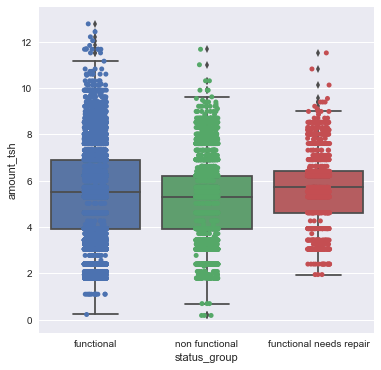

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.boxplot(amount_tsh_pos['status_group'], np.log1p(amount_tsh_pos['amount_tsh']), ax=ax)
sns.stripplot(amount_tsh_pos['status_group'], np.log1p(amount_tsh_pos['amount_tsh']), jitter=True, ax=ax)

In [23]:
# sns.distplot(train[train['amount_tsh']>0]['amount_tsh'])
# sns.distplot(train['amount_tsh'])
# train[(train['amount_tsh'] > 0) & (train['amount_tsh'] < 1000)]['amount_tsh'].count() / train['amount_tsh'].count()
train[(train['amount_tsh'] == 0)]['amount_tsh'].count() / train['amount_tsh'].count()

0.70099326599326595

## 地区相关

gps_height: gps高度，有缺失值

longitude: 经度

latitude: 纬度

In [ ]:
hei_long_la = train['gps_height', 'longitude', 'latitude', 'status_group']

In [43]:
print("miss rate of amount_tsh: ", miss_rate(train['amount_tsh']))
print("miss rate of gps_height: ", miss_rate(train['gps_height']))
print("miss rate of longitude: ", miss_rate(train['longitude']))
print("miss rate of latitude: ", miss_rate(train['latitude']))

miss rate of amount_tsh:  0.7009932659932661
miss rate of gps_height:  0.3440740740740741
miss rate of longitude:  0.03050505050505048
miss rate of latitude:  0.0


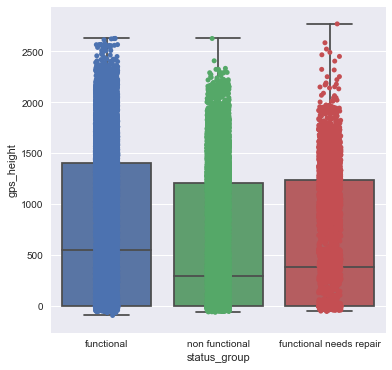

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.boxplot(train['status_group'], train['gps_height'], ax=ax)
sns.stripplot(train['status_group'], train['gps_height'], jitter=True, ax=ax)

In [70]:

long_lati_pos['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'], dtype=object)

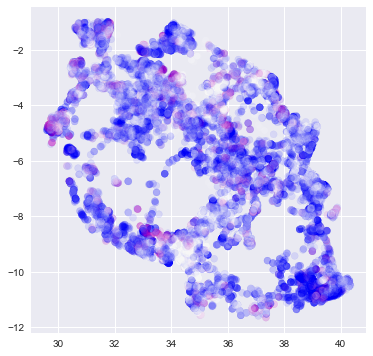

In [81]:
long_lati_pos = train[(train['longitude'] != 0) & (train['latitude'] != 0)][['longitude', 'latitude', 'status_group']]

cdict = {'functional': 'w', 'non functional': 'b', 'functional needs repair': 'm'}
long_lati_pos['status_color'] = long_lati_pos['status_group'].apply(lambda x: cdict[x])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
plt.scatter(long_lati_pos['longitude'], long_lati_pos['latitude'], alpha=0.1, c=long_lati_pos['status_color'])

## 地区相关

num_private

In [89]:
# 缺失率
miss_rate(train['num_private'])

0.9872558922558923

In [84]:
train['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

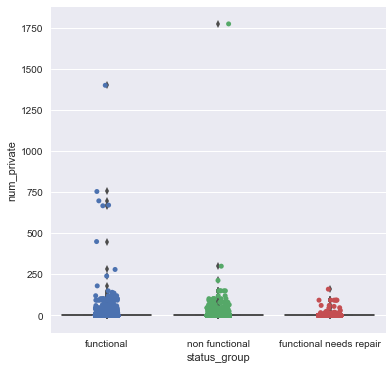

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.boxplot(train['status_group'], train['num_private'], ax=ax)
sns.stripplot(train['status_group'], train['num_private'], jitter=True, ax=ax)

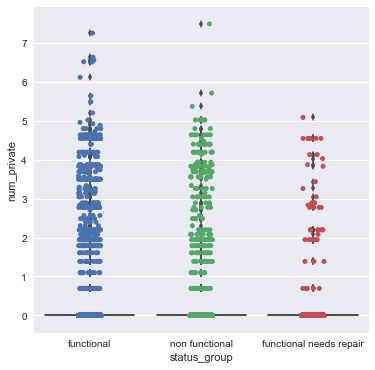

In [83]:
# 对数num_private
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.boxplot(train['status_group'], np.log1p(train['num_private']), ax=ax)
sns.stripplot(train['status_group'], np.log1p(train['num_private']), jitter=True, ax=ax)

## 地区相关

basin: 流域

subvillage: 地区

region: 地区

region_code: 地区code

district_code: 二级区域code

lga: 地区

ward: 地区

### 流域 basin

In [4]:
miss_rate(train['basin'])

0.0

In [22]:
pd.crosstab(train['basin'], train['status_group'])

status_group,functional,functional needs repair,non functional
basin,,,
Internal,4482,557,2746
Lake Nyasa,3324,250,1511
Lake Rukwa,1000,270,1184
Lake Tanganyika,3107,742,2583
Lake Victoria,5100,989,4159
Pangani,5372,477,3091
Rufiji,5068,437,2471
Ruvuma / Southern Coast,1670,326,2497
Wami / Ruvu,3136,269,2582


In [25]:
pd.crosstab(train['basin'], train['status_group']).apply(lambda x: x / x.sum(), axis=1)

# 流域之间的差别还是很大的

status_group,functional,functional needs repair,non functional
basin,,,
Internal,0.575723,0.071548,0.352730
Lake Nyasa,0.653687,0.049164,0.297148
Lake Rukwa,0.407498,0.110024,0.482478
Lake Tanganyika,0.483053,0.115361,0.401586
Lake Victoria,0.497658,0.096507,0.405835
Pangani,0.600895,0.053356,0.345749
Rufiji,0.635406,0.054789,0.309804
Ruvuma / Southern Coast,0.371689,0.072557,0.555753
Wami / Ruvu,0.523802,0.044931,0.431268


### subvillage: 地区

In [27]:
miss_rate(train['subvillage'])

0.0

In [30]:
pd.crosstab(train['subvillage'], train['status_group'], margins=True)

status_group,functional,functional needs repair,non functional,All
subvillage,,,,
##,1,0,0,1
'A' Kati,0,0,1,1
1,52,8,72,132
14Kambalage,5,0,0,5
18,0,0,1,1
19,1,0,2,3
20,0,0,1,1
22B,0,0,1,1
23B,0,0,1,1


### region: 地区
### region_code: 地区code
### district_code: 二级区域code

In [34]:
print("miss rate of region", miss_rate(train['region']))
print("miss rate of region_code", miss_rate(train['region_code']))
print("miss rate of district_code", miss_rate(train['district_code']))

miss rate of region 0.0
miss rate of region_code 0.0
miss rate of district_code 0.00038720538720538045


In [38]:
pd.crosstab(train['region_code'], train['status_group'], margins=True)

status_group,functional,functional needs repair,non functional,All
region_code,,,,
1,1009,209,983,2201
2,1978,174,872,3024
3,2640,322,1417,4379
4,1408,73,1032,2513
5,2147,300,1593,4040
6,1066,16,527,1609
7,461,3,341,805
8,26,15,259,300
9,139,21,230,390


In [45]:
pd.crosstab(train['region_code'], train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
region_code,,,
1,0.458428,0.094957,0.446615
2,0.654101,0.057540,0.288360
3,0.602877,0.073533,0.323590
4,0.560287,0.029049,0.410665
5,0.531436,0.074257,0.394307
6,0.662523,0.009944,0.327533
7,0.572671,0.003727,0.423602
8,0.086667,0.050000,0.863333
9,0.356410,0.053846,0.589744


In [47]:
train['lga'].unique().shape

(125,)

In [48]:
train['ward'].unique().shape

(2092,)

## 地区相关

population: 人口

public_meeting: 聚集区？


In [50]:
miss_rate(train['population'])

0.3599494949494949

In [54]:
population = train[train['population'] > 0][['population', 'status_group']]
population['log_pop'] = np.log1p(population['population'])

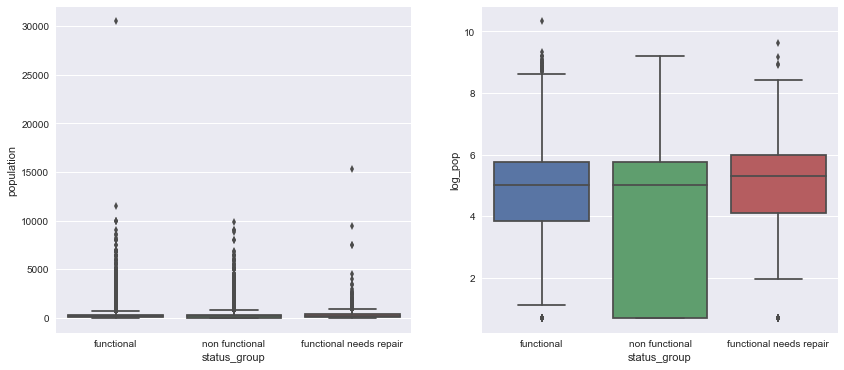

In [58]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.boxplot(data=population, x='status_group', y='population', ax=ax0)
sns.boxplot(data=population, x='status_group', y='log_pop', ax=ax1)

In [59]:
miss_rate(train['public_meeting'])

0.08510101010101012

In [60]:
train['public_meeting'].head()

0    True
1     NaN
2    True
3    True
4    True
Name: public_meeting, dtype: object

In [62]:
train['public_meeting'].dtype == 'object'

True

In [63]:
pd.crosstab(train['public_meeting'], train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
public_meeting,,,
False,0.429871,0.087438,0.482690
True,0.556899,0.072906,0.370195


## 取水点相关

construction_year: 建筑年份

wpt_name: 取水点的名字…

extraction_type: 抽水类型

extraction_type_group: 抽水类型分组

extraction_type_class: 抽水类型分类

payment: 付费类型

payment_type: 付费类型

water_quality: 水质

quality_group: 水质等级

quantity: 水量

quantity_group: 水量等级

source: 水源（同source_type）

source_type:水源类型（收集雨水、水坝、泉水、钻孔等）

source_class: 水源类型（地下水、地表水等）

waterpoint_type: 取水点类型

waterpoint_type_group: 同上

### construction_year: 建筑年份

In [43]:
miss_rate(train['construction_year'])

0.34863636363636363

In [44]:
train['construction_year'].head()

0    1999
1    2010
2    2009
3    1986
4       0
Name: construction_year, dtype: int64

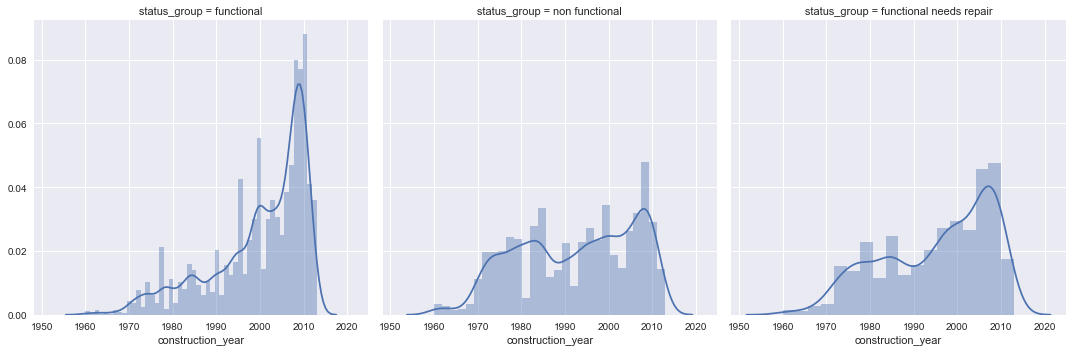

In [49]:
g = sns.FacetGrid(data=train[train['construction_year'] > 0], col='status_group', size=5, palette="RdBu_r")
g.map(sns.distplot, 'construction_year')

In [57]:
# 建筑年代汇总
const_year = pd.crosstab(train['construction_year'], train['status_group'], margins=False)
const_year['func+repair'] = const_year['functional'] + const_year['functional needs repair']
const_year['all'] = const_year['functional'] + const_year['functional needs repair'] + const_year['non functional']

# 把construction_year大于0的部分单独拿出来
const_year_pos = const_year.iloc[1:, :]

In [89]:
# 建筑年代各状态比例
const_year_prop = pd.crosstab(train[train['construction_year'] > 0]['construction_year'], train[train['construction_year'] > 0]['status_group'], margins=False, normalize='index')
const_year_prop['func+repair'] = const_year_prop['functional'] + const_year_prop['functional needs repair']
const_year_prop['all'] = const_year_prop['functional'] + const_year_prop['functional needs repair'] + const_year_prop['non functional']

bar order: 
	 functional needs repair
	 non functional
	 functional


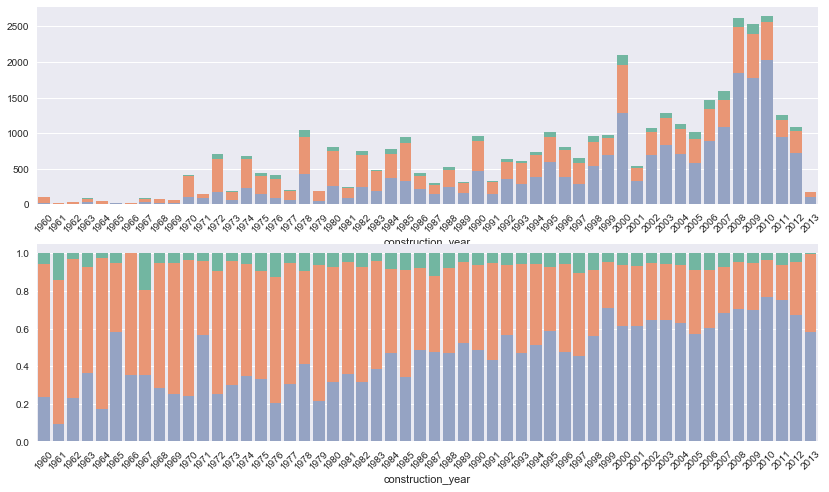

In [136]:
stacked_bar(train[train['construction_year'] > 0]['construction_year'], train[train['construction_year'] > 0]['status_group'])

### extraction_type: 抽水类型

### extraction_type_group: 抽水类型分组

### extraction_type_class: 抽水类型分类

In [102]:
print("miss rate of extraction_type: ", miss_rate(train['extraction_type']))
print("miss rate of extraction_type_group: ", miss_rate(train['extraction_type_group']))
print("miss rate of extraction_type_class: ", miss_rate(train['extraction_type_class']))

miss rate of extraction_type:  0.0
miss rate of extraction_type_group:  0.0
miss rate of extraction_type_class:  0.0


In [99]:
train['extraction_type'].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
       'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
       'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object)

In [100]:
train['extraction_type_group'].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'mono', 'wind-powered', 'afridev', 'rope pump',
       'india mark iii', 'other handpump', 'other motorpump'], dtype=object)

In [101]:
train['extraction_type_class'].unique()

array(['gravity', 'submersible', 'handpump', 'other', 'motorpump',
       'wind-powered', 'rope pump'], dtype=object)

In [181]:
extra_cnt.index

Index(['gravity', 'handpump', 'motorpump', 'other', 'rope pump', 'submersible',
       'wind-powered'],
      dtype='object', name='extraction_type_class')

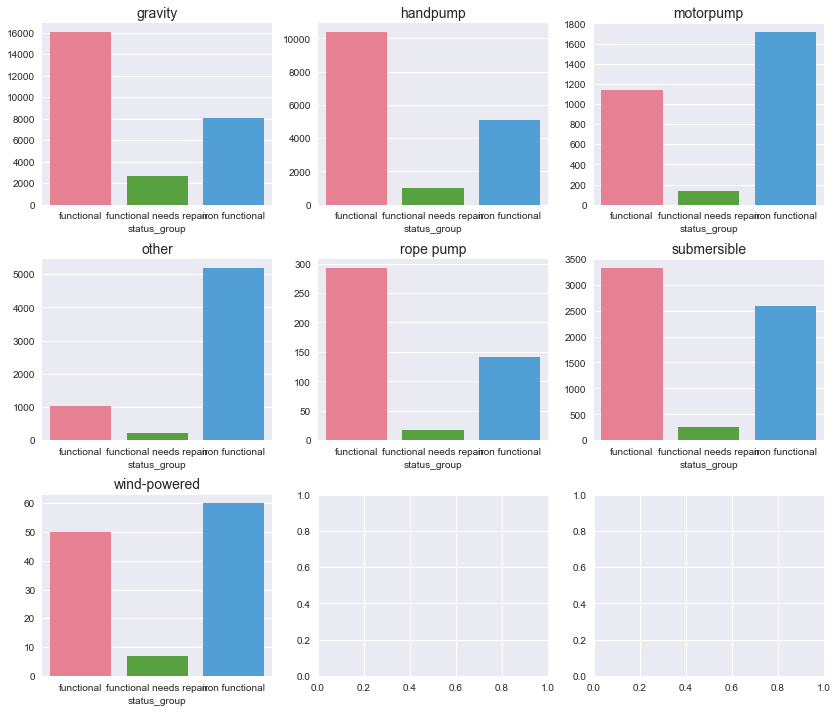

In [186]:
extra_cnt = pd.crosstab(train['extraction_type_class'], train['status_group'])
# g = sns.FacetGrid(data=train[['extraction_type_class', 'status_group']], col='extraction_type_class', size=3, col_wrap=3)
# g.map(sns.barplot, 'status_group')
extraction_type_class = extra_cnt.index
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))
plt.subplots_adjust(hspace=0.3)
for idx in range(extra_cnt.shape[0]):
    i, j = idx // 3, idx % 3
    _ax = ax[i][j]
    sns.barplot(x=extra_cnt.iloc[idx].index, y=extra_cnt.iloc[idx].values, palette='husl', ax=_ax)
    _ax.set_title(extra_cnt.index[idx], fontsize=14)

bar order: 
	 functional needs repair
	 non functional
	 functional


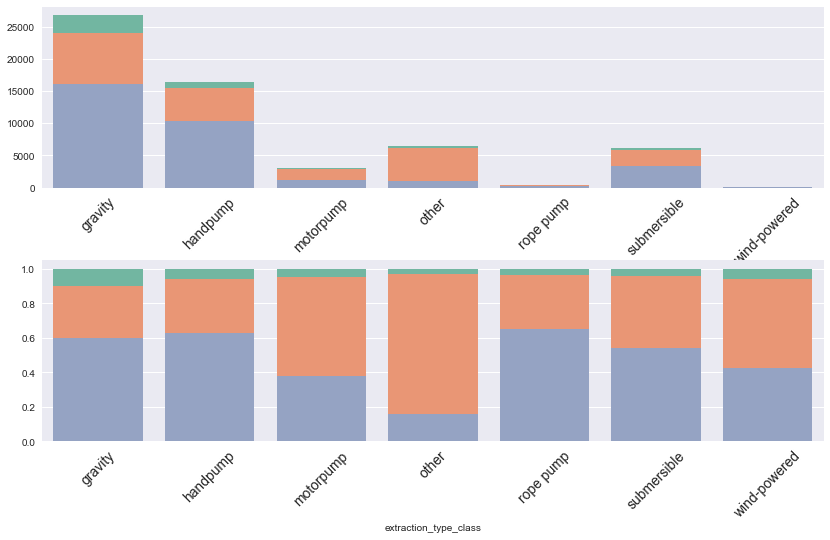

In [194]:
stacked_bar(train['extraction_type_class'], train['status_group'], ticksize=14, hspace=0.4)

### payment: 付费类型
### payment_type: 付费类型

In [201]:
miss_rate(train['payment_type'])

0.0

In [198]:
train['payment_type'].unique()

array(['annually', 'never pay', 'per bucket', 'unknown', 'on failure',
       'other', 'monthly'], dtype=object)

bar order: 
	 functional needs repair
	 non functional
	 functional


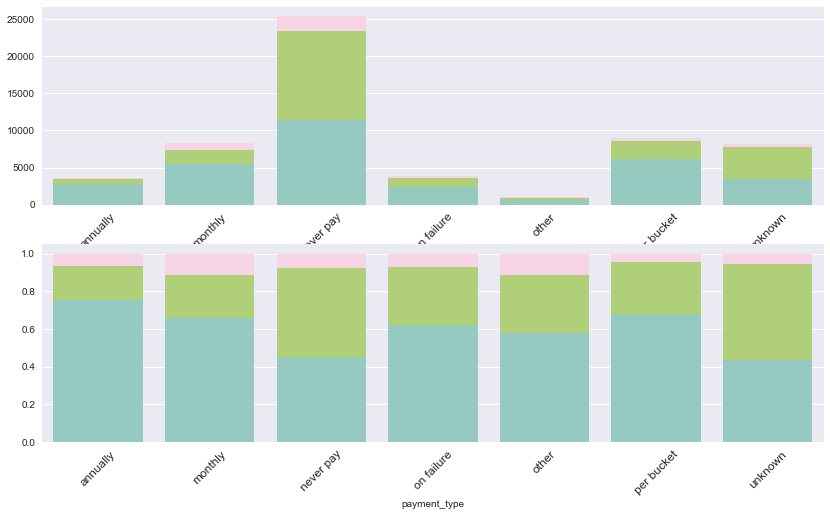

In [241]:
stacked_bar(train['payment_type'], train['status_group'], ticksize=12, palette='Set3', pal_random=True)

### water_quality: 水质
### quality_group: 水质等级

In [226]:
miss_rate(train['water_quality'])
miss_rate(train['quality_group'])

0.0

In [227]:
train['water_quality'].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

In [228]:
train['quality_group'].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'], dtype=object)

bar order: 
	 functional needs repair
	 non functional
	 functional


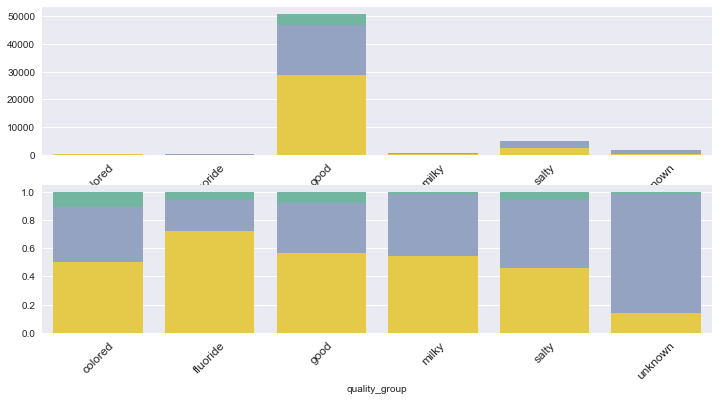

In [251]:
stacked_bar(train['quality_group'], train['status_group'], figsize=(12, 6), ticksize=12, palette='Set2')

### quantity: 水量
### quantity_group: 水量等级

In [255]:
(train['quantity_group'] == train['quantity']).sum()

59400

In [257]:
train['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'], dtype=object)

bar order: 
	 functional needs repair
	 non functional
	 functional


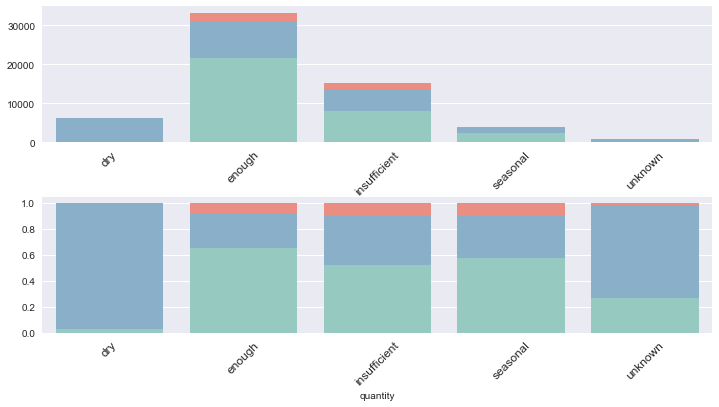

In [263]:
stacked_bar(train['quantity'], train['status_group'], figsize=(12, 6), ticksize=12, palette='Set3', hspace=0.4)

# 比较明显的是水量为dry时，水泵几乎都是坏的——似乎是显而易见的结论？

### source: 水源（同source_type）
### source_type:水源类型（收集雨水、水坝、泉水、钻孔等）
### source_class: 水源类型（地下水、地表水等）

In [267]:
miss_rate(train['source_class'])

0.0

In [268]:
train['source'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other',
       'shallow well', 'river', 'hand dtw', 'lake', 'unknown'], dtype=object)

In [270]:
train['source_type'].unique()

array(['spring', 'rainwater harvesting', 'dam', 'borehole', 'other',
       'shallow well', 'river/lake'], dtype=object)

In [269]:
train['source_class'].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

In [274]:
pd.crosstab(train['source_class'], train['status_group'])

status_group,functional,functional needs repair,non functional
source_class,,,
groundwater,24835,2741,18218
surface,7266,1571,4491
unknown,158,5,115


In [275]:
pd.crosstab(train['source_class'], train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
source_class,,,
groundwater,0.542320,0.059855,0.397825
surface,0.545168,0.117872,0.336960
unknown,0.568345,0.017986,0.413669


bar order: 
	 functional needs repair
	 non functional
	 functional


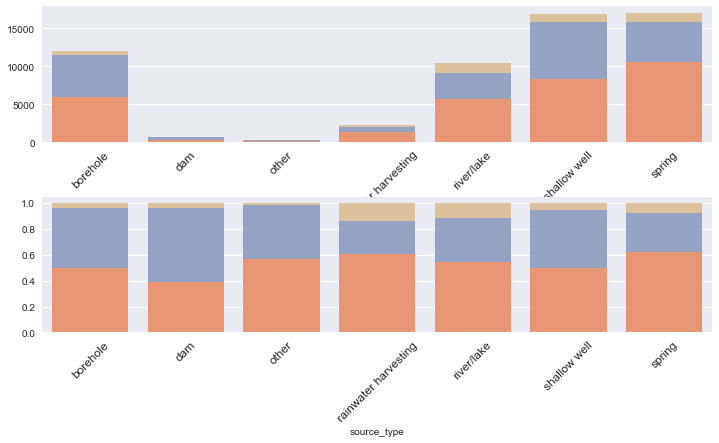

In [283]:
stacked_bar(train['source_type'], train['status_group'], figsize=(12, 6), ticksize=12, palette='Set2', hspace=0.4)

### waterpoint_type: 取水点类型
### waterpoint_type_group: 同上

In [287]:
train['waterpoint_type_group'].unique()

array(['communal standpipe', 'hand pump', 'other', 'improved spring',
       'cattle trough', 'dam'], dtype=object)

In [288]:
train['waterpoint_type'].unique()

array(['communal standpipe', 'communal standpipe multiple', 'hand pump',
       'other', 'improved spring', 'cattle trough', 'dam'], dtype=object)

## 特征选择